                                                ## BookStore Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#carico il dataset

In [3]:
comics = pd.read_excel('Bookstore_2009.xlsx')

In [4]:
#There are unnamed variables

In [5]:
comics.sample(2)
 

,Collana,Numero,Titolo,Qtà,prezzo,casaed,Fatt,Data_Acquisto,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
11873,Naruto il mito Gold,15,NaN,1.0,4.5,Marv,planet manga,2009-07-27,NaN,NaN,NaN,NaN,NaN
19279,Turn Over,113,NaN,1.0,3.9,Star,star manga,2009-12-05,NaN,NaN,NaN,NaN,NaN


In [6]:
#Dropping not useful variables

In [8]:
comics = comics.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'],axis = 1)

In [9]:

comics.sample(2)

,Collana,Numero,Titolo,Qtà,prezzo,casaed,Fatt,Data_Acquisto,Unnamed: 8
6582,Batman: punto di svolta,NaN,NaN,1.0,10.95,Pdea,dc universe,2009-05-02,NaN
19063,Luxley,NaN,NaN,1.0,16.00,Zer1,NaN,2009-12-05,NaN


In [9]:
comics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21337 entries, 0 to 21336
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Collana        21337 non-null  object        
 1   Numero         19198 non-null  object        
 2   Titolo         3973 non-null   object        
 3   Qtà            21334 non-null  float64       
 4   prezzo         21333 non-null  float64       
 5   casaed         21313 non-null  object        
 6   Fatt           19431 non-null  object        
 7   Data_Acquisto  21337 non-null  datetime64[ns]
 8   Cliente        18401 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.5+ MB


In [10]:
#"describe" method shows the main descpriptive statistics

In [10]:
comics.describe()

,Qtà,prezzo,Unnamed: 8
count,21334.000000,21333.000000,0.0
mean,1.001406,5.886024,NaN
std,0.070476,5.543875,NaN
min,1.000000,0.000000,NaN
25%,1.000000,3.000000,NaN
50%,1.000000,3.900000,NaN
75%,1.000000,5.900000,NaN
max,6.000000,186.000000,NaN


In [12]:
comics['Collana'].describe()

count          21337
unique          1665
top       Uomo Ragno
freq             668
Name: Collana, dtype: object

In [13]:
comics['Fatt'].describe()

count      19431
unique        26
top       marvel
freq        5405
Name: Fatt, dtype: object

In [14]:
comics['Cliente'].describe()

count               18401
unique                373
top       Francesco Negro
freq                 1208
Name: Cliente, dtype: object

In [15]:
#Histogram

Text(0.5, 1.0, 'Istogramma prezzo articoli')

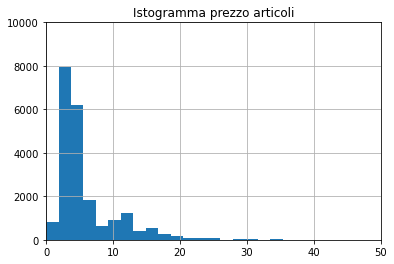

In [16]:
priceHist = comics['prezzo'].hist(bins = 100)
priceHist.set_xlim(0,50)
priceHist.set_ylim(0,10000)
plt.title('Istogramma prezzo articoli')

In [17]:
comics['Collana'].value_counts()

Uomo Ragno                                                  668
Marvel Miniserie                                            521
Thor & i nuovi vendicatori                                  446
100% Marvel                                                 430
Devil & Hulk                                                382
                                                           ... 
Buon Compleanno Star Comics                                   1
Zetman Volume Unico                                           1
The Witching                                                  1
Là, nel selvaggio West                                        1
Record of Lodoss War - La leggenda dell'eroico cavaliere      1
Name: Collana, Length: 1665, dtype: int64

In [18]:
comics['Fatt'].value_counts()

marvel            5405
planet manga      3723
dc universe       2950
star manga        1594
bonelli           1065
Bonelli            725
j-pop              642
Cult Comics        600
vertigo            592
altri manga        590
altri italiani     380
ratman             368
world comics       177
star ita           158
manga pdea         138
gp manga           120
wildstorm           75
Star Ita            47
Star ita            28
J-pop               25
cult comics         10
Marvel               7
marvel               6
Gp Manga             4
Star manga           1
dark horse           1
Name: Fatt, dtype: int64

In [19]:
comics['month_year'] = comics['Data_Acquisto'].dt.to_period('M')


In [20]:
comics['prezzotot'] = comics['Qtà']*comics['prezzo']

In [21]:
#Monthly Collections

In [22]:
df1 = comics.groupby('month_year', as_index=False)['prezzotot'].sum()
df1

,month_year,prezzotot
0,2009-01,8587.30
1,2009-02,7875.95
2,2009-03,9090.11
3,2009-04,9263.77
4,2009-05,10336.52
5,2009-06,14245.25
6,2009-07,10496.12
7,2009-08,6716.47
8,2009-09,11063.83
9,2009-10,9548.93


In [ ]:
#Monthly quantity sold

In [25]:
df2 = comics.groupby('month_year', as_index = False)['Qtà'].sum()
df2

,month_year,Qtà
0,2009-01,1495.0
1,2009-02,1682.0
2,2009-03,1776.0
3,2009-04,1550.0
4,2009-05,1698.0
5,2009-06,2233.0
6,2009-07,1790.0
7,2009-08,1253.0
8,2009-09,1910.0
9,2009-10,1714.0


Text(0.5, 1.0, 'Collections by month')

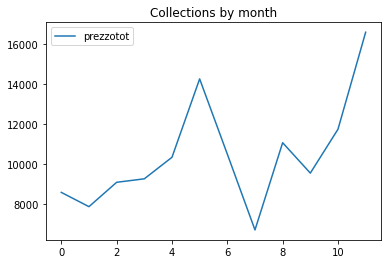

In [23]:
df1.plot()
plt.title('Collections by month')

Text(0.5, 1.0, 'Quantity sold by month')

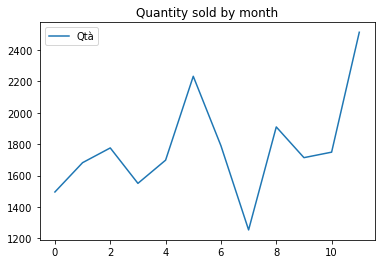

In [26]:
df2.plot()
plt.title('Quantity sold by month')

In [27]:
df1.describe()

,prezzotot
count,12.000000
mean,10460.988333
std,2730.676908
min,6716.470000
25%,8964.407500
50%,9942.725000
75%,11231.940000
max,16571.340000


In [28]:
df2.describe()

,Qtà
count,12.000000
mean,1780.333333
std,329.528405
min,1253.000000
25%,1649.000000
50%,1731.500000
75%,1820.000000
max,2514.000000


In [29]:
round(comics['prezzotot'].sum(),2)

125531.86

In [30]:
basket = comics.groupby(['casaed'],as_index = False)['Qtà'].sum().set_index('casaed')

In [31]:
basket.sort_values(by = ['Qtà'], ascending = False)

,Qtà
casaed,
Marv,10001.0
Pdea,3371.0
Star,1927.0
Bone,1461.0
Band,747.0
...,...
Pass,1.0
Vari,1.0
Wyrd,1.0
